In [173]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import colors

In [174]:
def shadow_remove(img):
    scale_percent = 30
    # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    rgb_planes = cv2.split(resized_image)
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_norm_planes.append(norm_img)
    shadowremov = cv2.merge(result_norm_planes)
    return shadowremov

In [175]:
def hog_preproessing_try(image):
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    filtered_image  = cv2.GaussianBlur(image, (3, 3), 1.0)
    plt.imshow(filtered_image)
    plt.show()
    resized_image = cv2.resize(filtered_image,(500,500))
    hsv_nemo = cv2.cvtColor(resized_image, cv2.COLOR_RGB2HSV)
    #===================================first Mask======================================================//
    Z = np.float32(hsv_nemo.reshape((-1,3)))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    _,labels,centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    labels = labels.reshape((hsv_nemo.shape[:-1]))
    #=====================================Second Mask======================================================//
    #=======================plotting
    pixel_colors = resized_image.reshape((np.shape(resized_image)[0]*np.shape(resized_image)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    h, s, v = cv2.split(hsv_nemo)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.show()
    #==========================range
    reduced = np.uint8(centers)[labels]
    result = [np.hstack([resized_image, reduced])]
    for i, c in enumerate(centers):
        mask = cv2.inRange(labels, i, i)
        mask = np.dstack([mask]*3) # Make it 3 channel
        ex_img = cv2.bitwise_and(resized_image, mask)
        ex_reduced = cv2.bitwise_and(reduced, mask)
        result.append(np.hstack([ex_img, ex_reduced]))

    cv2.imwrite('watermelon_out.jpg', np.vstack(result))
    # result=resized_image
    # light_orange = [0, 50, 50 ]
    # dark_orange = [25, 200, 255]
    # for i, c in enumerate(centers):
    #     print(c)
    #     print(all(int(c[j]) in range(light_orange[j],dark_orange[j]) for j in range(3)))
    #     if all(int(c[j]) in range(light_orange[j],dark_orange[j]) for j in range(3)):
    #             print("in check")
    #             mask = cv2.inRange(labels, i, i)
    #             mask = np.dstack([mask]*3) # Make it 3 channel
    #             result = cv2.bitwise_and(resized_image, mask)
    # # mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
    # # result = cv2.bitwise_and(resized_image, resized_image, mask=mask)
    # resized_image = cv2.resize(result,(128,128))
    # grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    return grayscale_image

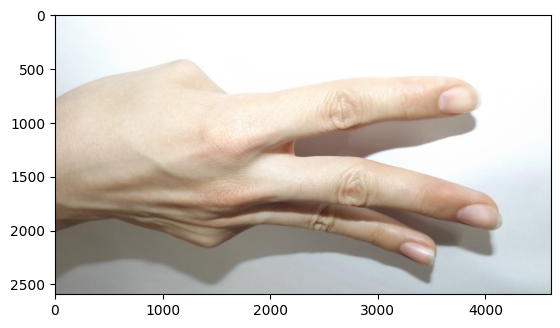

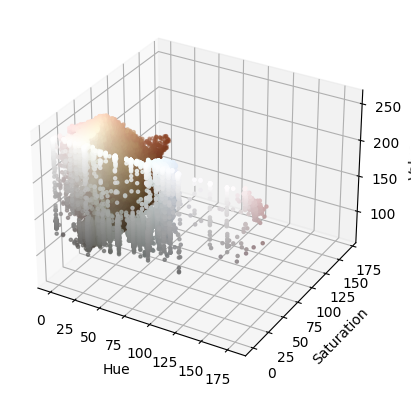

NameError: name 'grayscale_image' is not defined

In [176]:
image = cv2.imread('E:/2nd term 3rd year/Neural Network/Project/Distrubute_dataset/validation/3_men (2).JPG', cv2.IMREAD_UNCHANGED)
img=hog_preproessing_try(image)
plt.imshow(img)
plt.show()

# image = cv2.imread('E:/2nd term 3rd year/Neural Network/Project/Distrubute_dataset/men/2/2_men (120).JPG', cv2.IMREAD_UNCHANGED)
# img=hog_preproessing_try(image)
# plt.imshow(img, cmap='gray')
# plt.show()